<a href="https://colab.research.google.com/github/enf3tri/machine-learning/blob/main/LSTM_teslastock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, BatchNormalization
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error



In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Tesla Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Tesla Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv', index_col='Date', parse_dates='Date').str.replace(',','')
test_set = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv', index_col='Date', parse_dates=['Date']).values

TypeError: ignored

In [ ]:
training_set = training_set.values
#training_set = training_set.values


In [ ]:
training_set

AttributeError: ignored

In [ ]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

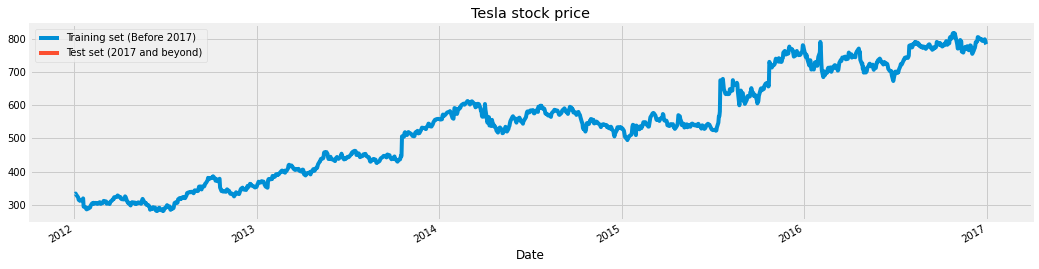

In [ ]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Tesla stock price')
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

ValueError: ignored

In [ ]:
X_train = []
y_train = []
for i in range(60,1640):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


In [ ]:
rgg = Sequential()

rgg.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1],1)))
rgg.add(Dropout(0.4))


rgg.add(LSTM(units = 64))
rgg.add(Dropout(0.4))



rgg.add(Dense(units = 1))

rgg.compile(optimizer= 'rmsprop',loss = 'mean_squared_error')

rgg.fit(X_train,y_train,epochs = 50, batch_size = 32)

NameError: ignored

In [ ]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60 :].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
X_test = []
y_test = []
for i in range(60,836):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
y_test = np.array(y_test)    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = rgg.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

IndexError: ignored

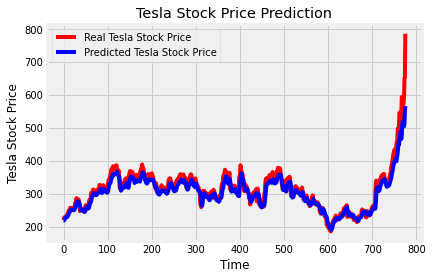

In [ ]:
plot_predictions(test_set,predicted_stock_price)

In [ ]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 19.92360745719456.
